In [10]:
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import scipy.stats as stats

In [11]:
np.set_printoptions(threshold=10e10, linewidth=10e10)

In [12]:
NUM_ARMS = 3
NUM_BANDITS = 6

In [13]:
def interleave_arrays(a: np.ndarray, b: np.ndarray) -> np.ndarray:
	return np.ravel((a, b), order='F')

In [14]:
# ms = np.sort(np.random.normal(0, 1, (NUM_BANDITS, NUM_ARMS))) # means
ms = np.array([
	[-0.1, -0.1, -0.1],
	[-0.1, -0.1, -0.1],
	[-0.1, -0.1,  0.5],
	[-0.1,  0.0,  0.1],
	[-0.1,  0.0,  0.5],
	[ 0.5,  0.6,  1.1],
])
vs = np.ones((NUM_BANDITS, NUM_ARMS)) # variances

# interleave means and variances together
# mvs = np.array([interleave_arrays(ms[i], vs[i]) for i in range(NUM_BANDITS)])
mvs = ms

print(mvs)

[[-0.1 -0.1 -0.1]
 [-0.1 -0.1 -0.1]
 [-0.1 -0.1  0.5]
 [-0.1  0.   0.1]
 [-0.1  0.   0.5]
 [ 0.5  0.6  1.1]]


/tmp/ipykernel_21099/941857645.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


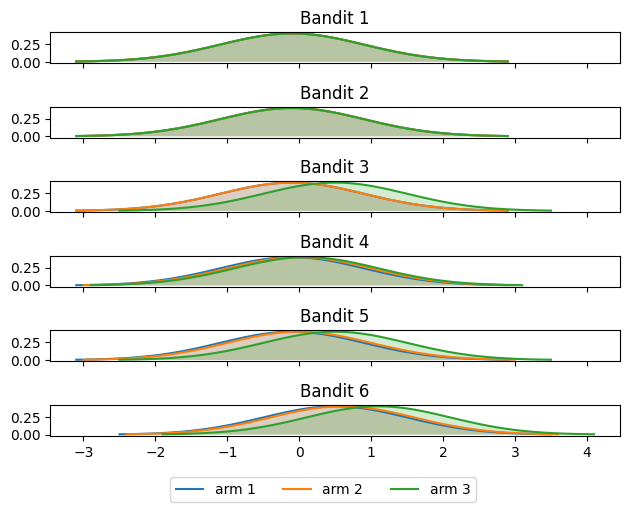

In [15]:
# plot all normal distributions
fig, axs = plt.subplots(NUM_BANDITS, 1, layout='constrained', sharex=True, sharey=True)

for bandit_idx, ax in enumerate(axs):
	for arm_idx, (_m, _v) in enumerate(zip(ms[bandit_idx], vs[bandit_idx])):
		x = np.linspace(_m - 3 * _v, _m + 3 * _v, 100)
		ax.plot(x, stats.norm.pdf(x, _m, _v), label=f'arm {arm_idx + 1}')
		# shade area under curve
		ax.fill_between(x, stats.norm.pdf(x, _m, _v), alpha=0.2)

	ax.set_title(f'Bandit {bandit_idx + 1}')

handles, labels = axs[0].get_legend_handles_labels()
axbox = axs[-1].get_position()
fig.legend(handles, labels, bbox_to_anchor=(axbox.x0 + 0.5 * axbox.width, axbox.y0 - 0.1), loc='upper center', ncol=NUM_ARMS)
plt.tight_layout()
# plt.show()
plt.savefig('data/img/pdf/bandits_dist.pdf', bbox_inches='tight', format='pdf')

# Using cosine similarity

only works for two bandits... unless we can find a way to do it for all bandits at once

[[-0.1 -0.1 -0.1]
 [-0.1 -0.1 -0.1]
 [-0.1 -0.1  0.5]
 [-0.1  0.   0.1]
 [-0.1  0.   0.5]
 [ 0.5  0.6  1.1]]
[[0.         0.         1.33333333 1.         1.45291081 1.94151308]
 [0.         0.         1.33333333 1.         1.45291081 1.94151308]
 [1.33333333 1.33333333 0.         0.18350342 0.01869324 0.37232461]
 [1.         1.         0.18350342 0.         0.16794971 0.68551455]
 [1.45291081 1.45291081 0.01869324 0.16794971 0.         0.27314524]
 [1.94151308 1.94151308 0.37232461 0.68551455 0.27314524 0.        ]]


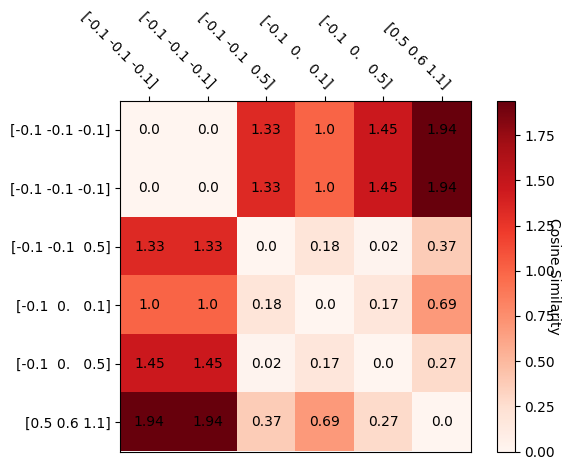

In [16]:
# calculate the cosine similarity between each bandit
similarities = np.zeros((NUM_BANDITS, NUM_BANDITS))
for i in range(NUM_BANDITS):
	for j in range(NUM_BANDITS):
		similarities[i, j] = cosine(mvs[i], mvs[j])

print(ms)
print(similarities)
plt.imshow(similarities, cmap='Reds')
for i in range(NUM_BANDITS):
	for j in range(NUM_BANDITS):
		plt.text(j, i, round(similarities[i, j], 2), ha='center', va='center', color='black')

cbar = plt.colorbar()
cbar.ax.set_ylabel('Cosine Similarity', rotation=-90)

plt.xticks(np.arange(NUM_BANDITS), labels=mvs)
plt.yticks(np.arange(NUM_BANDITS), labels=mvs)
plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(plt.gca().get_xticklabels(), rotation=-45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.savefig('data/img/pdf/cosine_similarity_heatmap.pdf', bbox_inches='tight', format='pdf')

# Using total variation (TV) distance

[[-0.1 -0.1 -0.1]
 [-0.1 -0.1 -0.1]
 [-0.1 -0.1  0.5]
 [-0.1  0.   0.1]
 [-0.1  0.   0.5]
 [ 0.5  0.6  1.1]]
[[ 0.          0.         12.86693094  6.55801421 15.05543538 51.83065223]
 [ 0.          0.         12.86693094  6.55801421 15.05543538 51.83065223]
 [12.86693094 12.86693094  0.         10.8673596   2.18850444 40.62978346]
 [ 6.55801421  6.55801421 10.8673596   0.          8.67885516 46.36024427]
 [15.05543538 15.05543538  2.18850444  8.67885516  0.         38.60079282]
 [51.83065223 51.83065223 40.62978346 46.36024427 38.60079282  0.        ]]


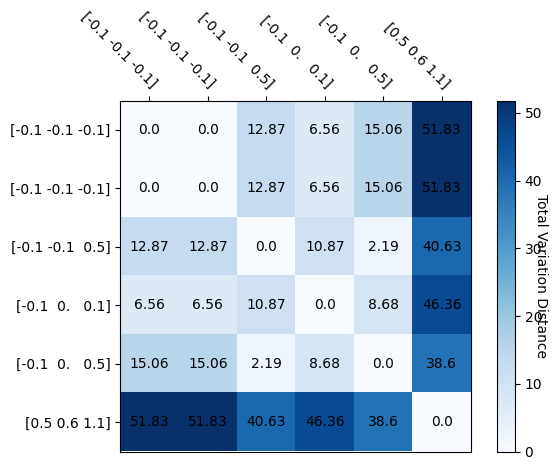

In [17]:
# calculate the total variation distance
tvs = np.zeros((NUM_BANDITS, NUM_BANDITS))
for i in range(NUM_BANDITS):
	for j in range(NUM_BANDITS):
		# min_m_i = np.min(mvs[i])
		# min_m_j = np.min(mvs[j])
		# sigma_i = 1
		# sigma_j = 1
		# x = np.linspace(min(min_m_i - 3 * sigma_i, min_m_j - 3 * sigma_j), max(min_m_i + 3 * sigma_i, min_m_j + 3 * sigma_j), 1000)
		# pdf_i = stats.norm.pdf(x, min_m_i, sigma_i)
		# pdf_j = stats.norm.pdf(x, min_m_j, sigma_j)
		# tvs[i, j] = 0.5 * np.sum(np.abs(mvs[i] - mvs[j]))
		distances = np.zeros(NUM_ARMS)
		for k in range(NUM_ARMS):
			x = np.linspace(ms[i, k] - 3 * vs[i, k], ms[i, k] + 3 * vs[i, k], 1000)
			pdf_i = stats.norm.pdf(x, ms[i, k], vs[i, k])
			pdf_j = stats.norm.pdf(x, ms[j, k], vs[j, k])
			distances[k] = 0.5 * np.sum(np.abs(pdf_i - pdf_j))
		tvs[i, j] = np.mean(distances)

print(ms)
print(tvs)
plt.imshow(tvs, cmap='Blues')
for i in range(NUM_BANDITS):
	for j in range(NUM_BANDITS):
		plt.text(j, i, round(tvs[i, j], 2), ha='center', va='center', color='black')

cbar = plt.colorbar()
cbar.ax.set_ylabel('Total Variation Distance', rotation=-90)

plt.xticks(np.arange(NUM_BANDITS), labels=mvs)
plt.yticks(np.arange(NUM_BANDITS), labels=mvs)
plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(plt.gca().get_xticklabels(), rotation=-45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.savefig('data/img/pdf/tvd_heatmap.pdf', bbox_inches='tight', format='pdf')